In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpmd_api as io
import pytest

In [2]:
series_sb = io.Series("diags_sb/openPMD/monitor.h5", io.Access.read_only)
series_sbx1 = io.Series("diags_sbx1/openPMD/monitor.h5", io.Access.read_only)
series_cf = io.Series("diags_cf/openPMD/monitor.h5", io.Access.read_only)
series_cfx1 = io.Series("diags_cfx1/openPMD/monitor.h5", io.Access.read_only)

In [3]:
it_sb = list(series_sb.iterations)
print('it_sb: ', it_sb)
it_sbx1 = list(series_sbx1.iterations)
print(it_sbx1)

it_sb:  [1, 18]
[1, 3]


In [4]:
it_cf = list(series_cf.iterations)
print('it_sb: ', it_cf)
it_cfx1 = list(series_cfx1.iterations)
print(it_cfx1)

it_sb:  [1, 18]
[1, 3]


In [5]:
final_sb =  series_sb.iterations[it_sb[-1]].particles["beam"].to_df()
final_sbx1 =  series_sbx1.iterations[it_sbx1[-1]].particles["beam"].to_df()
final_cf =  series_cf.iterations[it_cf[-1]].particles["beam"].to_df()
final_cfx1 =  series_cfx1.iterations[it_cfx1[-1]].particles["beam"].to_df()

In [6]:
final_sb.columns

Index(['id', 'momentum_t', 'momentum_x', 'momentum_y', 'position_t',
       'position_x', 'position_y', 'positionOffset_t', 'positionOffset_x',
       'positionOffset_y', 'qm', 'weighting'],
      dtype='object')

In [7]:
series_sb.iterations[it_sb[-1]].particles["beam"].attributes

['alpha_t',
 'alpha_x',
 'alpha_y',
 'beta_gamma_ref',
 'beta_ref',
 'beta_t',
 'beta_x',
 'beta_y',
 'charge_C',
 'charge_ref',
 'dispersion_px',
 'dispersion_py',
 'dispersion_x',
 'dispersion_y',
 'emittance_t',
 'emittance_tn',
 'emittance_x',
 'emittance_xn',
 'emittance_y',
 'emittance_yn',
 'gamma_ref',
 'mass_ref',
 'pt_max',
 'pt_mean',
 'pt_min',
 'pt_ref',
 'px_max',
 'px_mean',
 'px_min',
 'px_ref',
 'py_max',
 'py_mean',
 'py_min',
 'py_ref',
 'pz_ref',
 's_ref',
 'sig_pt',
 'sig_px',
 'sig_py',
 'sig_t',
 'sig_x',
 'sig_y',
 't_max',
 't_mean',
 't_min',
 't_ref',
 'x_max',
 'x_mean',
 'x_min',
 'x_ref',
 'y_max',
 'y_mean',
 'y_min',
 'y_ref',
 'z_ref']

In [8]:
final_sb["position_t"].shape

(16,)

In [9]:
final_sb["position_t"]

row
0     0.000000
1    -0.001634
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
Name: position_t, dtype: float64

In [10]:
final_cf["position_t"][1]

np.float64(-0.0016344897900358452)

In [11]:
final_sb["position_t"][1]

np.float64(-0.0016344897900469335)

In [12]:
final_cf["position_t"][1] == final_sb["position_t"][1]

np.False_

In [13]:
print('pt particle 1 SB 1 slice: ', final_sbx1['position_t'][1])
print('pt particle 1 SB 16 slices: ', final_sb['position_t'][1])
print('pt particle 1 CF 1 slice: ', final_cfx1['position_t'][1])
print('pt particle 1 cf 16 slices: ', final_cf['position_t'][1])

pt particle 1 SB 1 slice:  -0.0016344897900451016
pt particle 1 SB 16 slices:  -0.0016344897900469335
pt particle 1 CF 1 slice:  -0.001634489790044824
pt particle 1 cf 16 slices:  -0.0016344897900358452


In [14]:
ref_part_sb = pd.read_csv('diags_sb/ref_particle.0.0', sep='\\s+')
ref_part_sbx1 = pd.read_csv('diags_sbx1/ref_particle.0.0', sep='\\s+')
ref_part_cf = pd.read_csv('diags_cf/ref_particle.0.0', sep='\\s+')
ref_part_cfx1 = pd.read_csv('diags_cfx1/ref_particle.0.0', sep='\\s+')

In [15]:
ref_part_sb

,step,s,beta,gamma,beta_gamma,x,y,z,t,px,py,pz,pt
0,0,0.00,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
1,1,0.00,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
2,2,0.25,0.841811,1.852631,1.559565,-0.000682,0,0.249999,0.296979,-0.008506,0,1.559542,-1.852631
3,3,0.50,0.841811,1.852631,1.559565,-0.002727,0,0.499990,0.593958,-0.017012,0,1.559472,-1.852631
4,4,0.75,0.841811,1.852631,1.559565,-0.006136,0,0.749967,0.890937,-0.025517,0,1.559356,-1.852631
5,5,1.00,0.841811,1.852631,1.559565,-0.010908,0,0.999921,1.187916,-0.034022,0,1.559194,-1.852631
6,6,1.25,0.841811,1.852631,1.559565,-0.017043,0,1.249845,1.484894,-0.042525,0,1.558985,-1.852631
7,7,1.50,0.841811,1.852631,1.559565,-0.024542,0,1.499732,1.781873,-0.051028,0,1.558730,-1.852631
8,8,1.75,0.841811,1.852631,1.559565,-0.033403,0,1.749575,2.078852,-0.059528,0,1.558428,-1.852631
9,9,2.00,0.841811,1.852631,1.559565,-0.043626,0,1.999365,2.375831,-0.068027,0,1.558080,-1.852631


In [16]:
ref_part_sbx1

,step,s,beta,gamma,beta_gamma,x,y,z,t,px,py,pz,pt
0,0,0,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
1,1,0,0.841811,1.852631,1.559565,0.000000,0,0.000000,0.000000,0.000000,0,1.559565,-1.852631
2,2,4,0.841811,1.852631,1.559565,-0.174422,0,3.994925,4.751662,-0.135925,0,1.553630,-1.852631
3,3,4,0.841811,1.852631,1.559565,-0.174422,0,3.994925,4.751662,-0.135925,0,1.553630,-1.852631


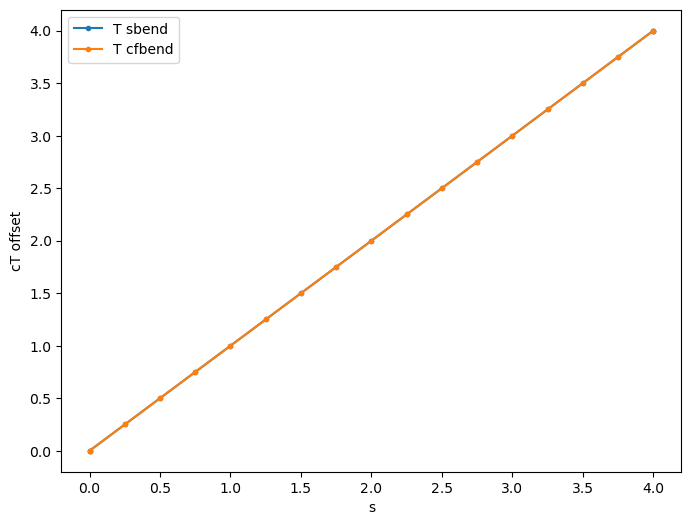

In [17]:
beta=ref_part_sb['beta'][0]
plt.plot(ref_part_sb['s'], ref_part_sb['t']*beta, '.-', label='T sbend')
plt.plot(ref_part_cf['s'], ref_part_cf['t']*beta, '.-', label='T cfbend')
plt.xlabel('s')
plt.ylabel('cT offset')
plt.legend(loc='best')
        

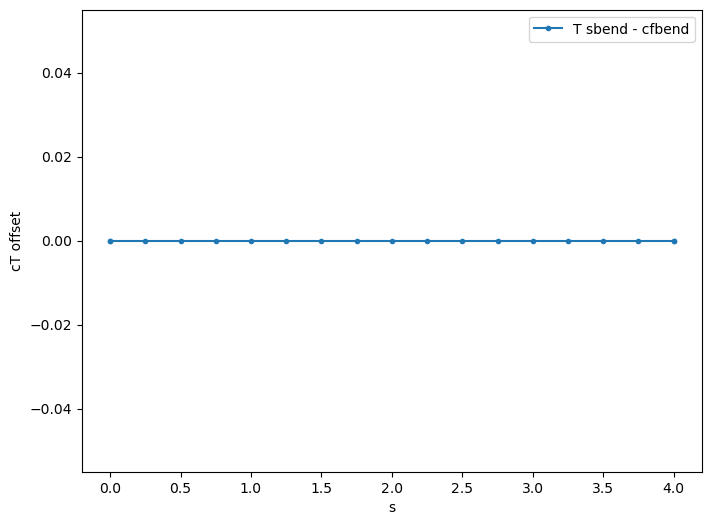

In [18]:
beta=ref_part_sb['beta'][0]
plt.plot(ref_part_sb['s'], (ref_part_sb['t']-ref_part_cf['t'])*beta, '.-', label='T sbend - cfbend')
plt.xlabel('s')
plt.ylabel('cT offset')
plt.legend(loc='best')


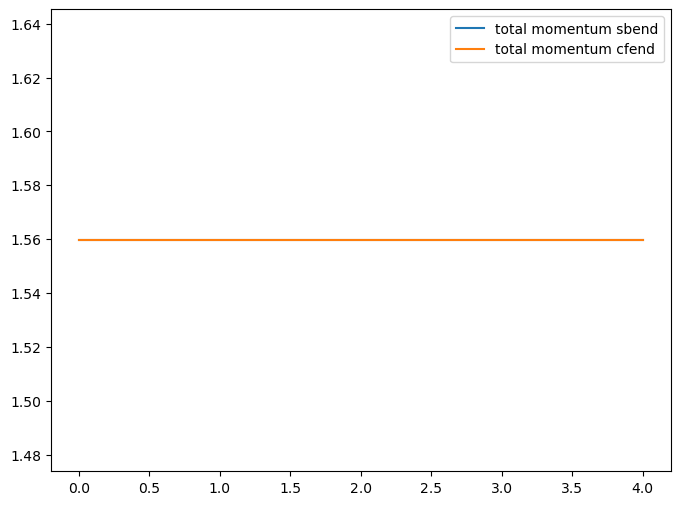

In [19]:
#print(type(ref_part_sb['px']))
#print(ref_part_sb['px']**2 + ref_part_sb['pz']**2)
p_sb = np.sqrt(np.array(ref_part_sb['px'])**2 + np.array(ref_part_sb['pz']**2))
p_cf = np.sqrt(np.array(ref_part_cf['px'])**2 + np.array(ref_part_cf['pz']**2))
#print(p_sb)
plt.plot(ref_part_sb['s'], p_sb, label='total momentum sbend')
plt.plot(ref_part_cf['s'], p_cf, label='total momentum cfend')
#plt.xlabel('s')
#plt.ylabel('momentum')
plt.legend(loc='best')

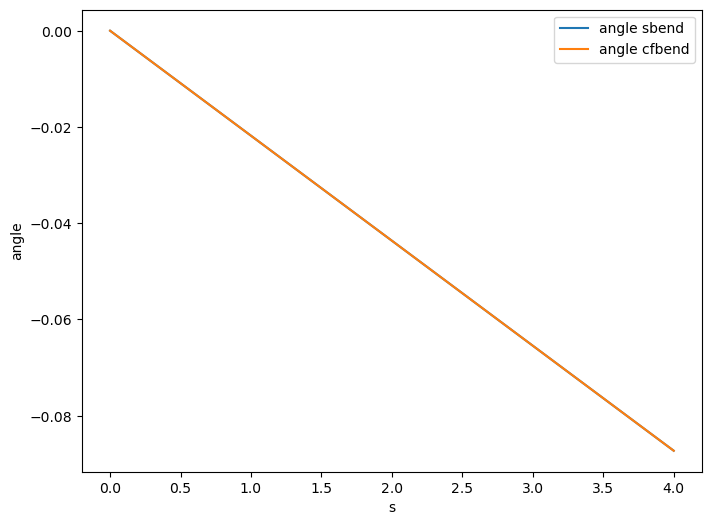

In [20]:
angle_sb = np.arctan2(ref_part_sb['px'], ref_part_sb['pz'])
angle_cf = np.arctan2(ref_part_cf['px'], ref_part_cf['pz'])
plt.plot(ref_part_sb['s'], angle_sb, label='angle sbend')
plt.plot(ref_part_cf['s'], angle_cf, label='angle cfbend')
plt.xlabel('s')
plt.ylabel('angle')
plt.legend(loc='best')

In [21]:
print('final angle sbend: ', angle_sb.to_numpy()[-1], 'radians, ', angle_sb.to_numpy()[-1]*180/np.pi, 'degrees')
print('final angle cfbend: ', angle_cf.to_numpy()[-1], 'radians, ', angle_cf.to_numpy()[-1]*180/np.pi, 'degrees') 

final angle sbend:  -0.08726646259971647 radians,  -5.0 degrees
final angle cfbend:  -0.08726646259971647 radians,  -5.0 degrees


In [22]:
angle_sbx1 = np.arctan2(ref_part_sbx1['px'], ref_part_sbx1['pz'])
angle_cfx1 = np.arctan2(ref_part_cfx1['px'], ref_part_cfx1['pz'])
print('final angle sbendx1: ', angle_sbx1.to_numpy()[-1], 'radians, ', angle_sbx1.to_numpy()[-1]*180/np.pi, 'degrees')
print('final angle cfbendx1: ', angle_cfx1.to_numpy()[-1], 'radians, ', angle_cfx1.to_numpy()[-1]*180/np.pi, 'degrees') 

final angle sbendx1:  -0.08726646259971642 radians,  -4.9999999999999964 degrees
final angle cfbendx1:  -0.08726646259971642 radians,  -4.9999999999999964 degrees


In [24]:
beta_ref = ref_part_sb['beta'][0]
gamma_ref = ref_part_sb['gamma'][0]
beta_gamma_ref = ref_part_sb['beta_gamma'][0]
print('beta ref: ', beta_ref)
print('gamma_ref: ', gamma_ref)
print('beta_gamma_ref: ', beta_gamma_ref)

beta ref:  0.8418107058090252
gamma_ref:  1.8526311386790644
beta_gamma_ref:  1.5595647264552013


In [25]:
ptoffs = final_sb['momentum_t'][1]
print('pt offset particle 1: ', ptoffs)

pt offset particle 1:  -0.001


In [38]:
gamma1 = gamma_ref - ptoffs*beta_gamma_ref
betagamma1 = np.sqrt(gamma1**2-1)
beta1 = betagamma1/gamma1
angle = np.pi/36
L = 4.0
R0 = L/angle
R1 = R0 * betagamma1/beta_gamma_ref
D = R1-R0
sec2 = 1.0/np.cos(angle)**2
# solve
# y^2 sec^2 theta + 2 D y + D^2-R1^2 = 0
#

#y = ( -2*D + np.sqrt(4*D**2 - 4*sec2*(D**2 - R1**2)) )/(2*sec2)
y = ( -2*D + np.sqrt(4*D**2 - 4*sec2*(R0**2 - 2*R0*R1)) )/(2*sec2)
x = y * np.tan(angle)
angle2 = np.arctan2(x, y+D)
L2 = R1*angle2

t_expected = L2/beta1 - L/beta_ref
print('particle 1, t_expected: ', t_expected)

particle 1, t_expected:  -0.0016344897900459898


In [39]:
print('final_sb rel diff: ', final_sb['position_t'][1]/t_expected-1)
print('final_sbx1 rel diff: ', final_sbx1['position_t'][1]/t_expected-1)
print('final_cf rel diff: ', final_cf['position_t'][1]/t_expected-1)
print('final_cfx1 rel diff: ', final_cfx1['position_t'][1]/t_expected-1)
assert final_sb['position_t'][1] == pytest.approx(t_expected, rel=1.0e-13)
assert final_sbx1['position_t'][1] == pytest.approx(t_expected, rel=1.0e-13)
assert final_cf['position_t'][1] == pytest.approx(t_expected, rel=1.0e-13)
assert final_cfx1['position_t'][1] == pytest.approx(t_expected, rel=1.0e-13)

final_sb rel diff:  5.773159728050814e-13
final_sbx1 rel diff:  -5.433431482515516e-13
final_cf rel diff:  -6.206590796864475e-12
final_cfx1 rel diff:  -7.132072710192006e-13
